Detecting the intent in the customer reviews / deciding if the review is either 'purchase intent', 'complaint intent', 'recommendation intent', 'informational query', and 'feedback/suggestion'

In [11]:
#Load the dataset
import pandas as pd

entire_dataset = pd.read_json('main_output_emotion_scores.json', lines=True) 

In [12]:
entire_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores
0,1,0,True,A2KGOFRA94OWS9,B00GZOI1OC,Unknown,jlpoole520,"The part (the biggest part, the wheel) didn't ...","The part (the biggest part, the wheel) didn't ...",0,part biggest part wheel didnt fit buy new mach...,part biggest part wheel didnt fit,49,22,"[realization, fear, confusion, pride, neutral]","[0.336, 0.225, 0.221, 0.044, 0.043]"
1,1,0,True,A1LIJY0J529J27,B00LHQYW0A,Unknown,John P,Incomplete order. Picture shows two heating e...,"Incomplete order, missing one heating element",0,incomplete order picture show two heating elem...,incomplete order missing one heating element,11,9,"[pride, embarrassment, anger, neutral, nervous...","[0.817, 0.067, 0.049, 0.029, 0.010]"
2,1,0,False,A3OMTDM4HR5XV9,B0050KMOM2,Unknown,steve combs,best bushing I've had in a long time,best bushing I've had in a long time,0,best bushing ive long time,best bushing ive long time,8,5,"[disappointment, disapproval, pride, confusion...","[0.990, 0.004, 0.001, 0.001, 0.000]"
3,1,0,False,A10M3NOJHRC4F4,B001GD43RG,Unknown,Amazon Customer,"Biggest piece of s*** we ever bought, replaced...","Biggest piece of s*** we ever bought, replaced...",0,biggest piece ever bought replaced motor 4 tim...,biggest piece ever bought replaced motor,22,14,"[pride, disapproval, disappointment, excitemen...","[0.994, 0.001, 0.001, 0.001, 0.000]"
4,1,0,True,A3LF8E0TB9XWMZ,B00LJ5K82K,Unknown,Amazon Customer,dud shorted out element burned out the same da...,not very happy,0,dud shorted element burned daynot happy,happy,11,6,"[surprise, anger, pride, neutral, embarrassment]","[0.520, 0.283, 0.077, 0.038, 0.026]"


In [13]:
entire_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980383 entries, 0 to 1980382
Data columns (total 16 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   overall                  int64 
 1   vote                     int64 
 2   verified                 bool  
 3   reviewerID               object
 4   asin                     object
 5   style                    object
 6   reviewerName             object
 7   reviewText               object
 8   summary                  object
 9   has_image                int64 
 10  clean_reviewText         object
 11  clean_summary            object
 12  reviewText_length        int64 
 13  clean_reviewText_length  int64 
 14  review_emotions          object
 15  review_emotion_scores    object
dtypes: bool(1), int64(5), object(10)
memory usage: 228.5+ MB


In [7]:
#Creating a sample dataset
sample_dataset = entire_dataset.sample(n=100000, random_state=42)

In [8]:
#Save the sample dataset
sample_dataset.to_json('sample_dataset_intent.json', orient='records', lines=True)

In [9]:
sample_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1353734 to 405049
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   overall                  100000 non-null  int64 
 1   vote                     100000 non-null  int64 
 2   verified                 100000 non-null  bool  
 3   reviewerID               100000 non-null  object
 4   asin                     100000 non-null  object
 5   style                    100000 non-null  object
 6   reviewerName             100000 non-null  object
 7   reviewText               100000 non-null  object
 8   summary                  100000 non-null  object
 9   has_image                100000 non-null  int64 
 10  clean_reviewText         100000 non-null  object
 11  clean_summary            100000 non-null  object
 12  reviewText_length        100000 non-null  int64 
 13  clean_reviewText_length  100000 non-null  int64 
 14  review_emotions    

In [10]:
!pip install scikit-learn

'clean_reviewText' is the column for the tokenized and preprocessed review text

Vectorize the text using TF-IDF vectorizer from  scikit-learn 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000) 

# Fit and transform the cleaned text
tfidf_vectors = vectorizer.fit_transform(sample_dataset['clean_reviewText'])

# tfidf_vectors is a sparse matrix. To convert it to a dense matrix:
dense_vectors = tfidf_vectors.toarray()

dense_vectors is used as an input for the machine learning models

Now lets perform k-means clustering on the vectorized data

In [12]:
from sklearn.cluster import KMeans
import numpy as np

In [13]:
#The cluster number for the 5 different intent types
n_clusters = 5

In [14]:
#The k-means algorithm partitions the text data into k distinct clusters where each text vector is assigned to the nearest cluster center
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [15]:
#Fitting - this step involves providing the algorithm with the data allowing it to learn how to cluster the reviews
kmeans.fit(dense_vectors)

C:\Users\adnan\anaconda3\New folder\envs\mynewenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

Assign the clusters to the data - After clustering, each review is assigned a label corresponding to the cluster it's most closely associated with. These labels range from 0 to 4 (for five clusters) and are stored in the labels_ attribute of the fitted KMeans object. 

In [16]:
sample_dataset['cluster'] = kmeans.labels_

Review the clusters - This step is to understand which cluster a sample of reviews belong to by judging by the eye as they are clustered based on methematical criteria

In [17]:
#Print out some of the reviews from each cluster to understand their characteristics 
for i in range(n_clusters):
    print(f"Cluster {i} reviews:")
    print(sample_dataset[sample_dataset['cluster'] == i]['clean_reviewText'].head(), '\n')

Cluster 0 reviews:
751410    fit great thin soft
146724          fit perfectly
283592                   nice
672822                   nice
666815                perfect
Name: clean_reviewText, dtype: object 

Cluster 1 reviews:
751322                             good
613562          always crackingnot good
1026710                      taste good
870437              good bit large size
1746318    good quality better one usmc
Name: clean_reviewText, dtype: object 

Cluster 2 reviews:
120217                               great price work great
359843    great part great price perfect fit 2000 expedi...
784215                                           look great
88207                                            work great
784061    purchased phone temporary phone 1020 busted co...
Name: clean_reviewText, dtype: object 

Cluster 3 reviews:
1353734    make getting large roast pan easy dont forget ...
1730710    curious durable would ordering 2 chopped cocon...
1687571    price one best hat bu

Labelling clusters and applying to the data 

In [18]:
#Map the cluster labels to the intent labels
cluster_to_intent = {
    0: 'purchase_intent',
    1: 'complaint intent',
    2: 'recommendation intent',
    3: 'informational query',
    4: 'feedback/suggestion'
}

In [19]:
#Apply mapped labels to the dataset
sample_dataset['review_intent'] = sample_dataset['cluster'].map(cluster_to_intent)

In [20]:
#Analyze and use the labelled data
print(sample_dataset['review_intent'].value_counts())

review_intent
informational query      85059
purchase_intent           5802
recommendation intent     4427
complaint intent          2379
feedback/suggestion       2333
Name: count, dtype: int64


In [21]:
#Now lets print the review intent for the review text
print(sample_dataset[['clean_reviewText', 'review_intent']].head())

                                          clean_reviewText  \
1353734  make getting large roast pan easy dont forget ...   
120217                              great price work great   
1730710  curious durable would ordering 2 chopped cocon...   
1687571  price one best hat buy plan buying another cou...   
751410                                 fit great thin soft   

                 review_intent  
1353734    informational query  
120217   recommendation intent  
1730710    informational query  
1687571    informational query  
751410         purchase_intent  


In [22]:
sample_dataset.head(10)

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,emotions_str,cluster,review_intent
1353734,5,4,True,AI9P883IL85RF,B004E5QJQ6,{'Color:': ' Black'},Jay Burn,This makes getting a large roast out of the pa...,"Don't roast a 20 pound ""beast"" without it.",0,make getting large roast pan easy dont forget ...,dont roast 20 pound beast without,38,21,"[amusement, pride, surprise, disapproval, real...","[0.719, 0.131, 0.047, 0.019, 0.019]","amusement, pride, surprise, disapproval, reali...",3,informational query
120217,5,0,True,A1ED7YP0AZ5MTS,B000HE6ECM,Unknown,Reader 1,Great price. Works great!!,Five Stars,0,great price work great,five star,4,4,"[disappointment, disapproval, pride, confusion...","[0.994, 0.002, 0.001, 0.000, 0.000]","disappointment, disapproval, pride, confusion,...",2,recommendation intent
1730710,5,9,True,A179UKCSK3WE50,B01EYCEBMC,Unknown,Drea Jeffries,"I was curious about how durable it would be, a...",more than just a pretty blade,0,curious durable would ordering 2 chopped cocon...,pretty blade,37,17,"[approval, pride, gratitude, disappointment, n...","[0.881, 0.033, 0.026, 0.019, 0.013]","approval, pride, gratitude, disappointment, ne...",3,informational query
1687571,5,0,True,AMAWMMWM7IVTL,B00EQSL3LC,"{'Size:': ' Large/X-Large', 'Team Name:': ' Bo...",Amazon Customer,For the price this is one of the best hats tha...,Very comfortable,0,price one best hat buy plan buying another cou...,comfortable,23,10,"[pride, disapproval, excitement, neutral, disg...","[0.995, 0.002, 0.001, 0.000, 0.000]","pride, disapproval, excitement, neutral, disgust",3,informational query
751410,5,0,True,A3AP2MA7YIWA4F,B00T42620M,Unknown,Rick In NorthEast,"Fits great, thin and soft.",Good buy.,0,fit great thin soft,good buy,5,4,"[disappointment, disapproval, pride, confusion...","[0.991, 0.003, 0.002, 0.001, 0.000]","disappointment, disapproval, pride, confusion,...",0,purchase_intent
1253496,4,3,True,AHOA85GY3G7Q7,B0095PC6UI,{'Style Name:': ' Black'},Trisha,"This chopper is good for many things, but not ...","Good for many things, but not everything",0,chopper good many thing everything work well s...,good many thing everything,26,14,"[pride, disapproval, disappointment, excitemen...","[0.975, 0.018, 0.003, 0.001, 0.000]","pride, disapproval, disappointment, excitement...",3,informational query
1780574,5,0,True,A22Q9MIG98QU0T,B00QBW8Z08,Unknown,aidoly,Excelente,Five Stars,0,excelente,five star,1,1,"[pride, disappointment, disapproval, admiratio...","[0.877, 0.092, 0.014, 0.003, 0.002]","pride, disappointment, disapproval, admiration...",3,informational query
169438,5,3,False,AMHL204PVY3I2,B00BUQMUSS,Unknown,Tony T. Wong,I got this unit from HCcost. One of the stove...,However the customer support of HCcost was ama...,0,got unit hccost one stove work thermal couple ...,however customer support hccost amazing fixed ...,52,27,"[disappointment, disapproval, pride, fear, exc...","[0.974, 0.010, 0.009, 0.001, 0.001]","disappointment, disapproval, pride, fear, exci...",3,informational query
917318,5,0,True,A2Z1NF15JREEXX,B00FXW7ZZS,"{'Color:': ' Platinum-Plated', 'Metal Type:': ...",Robin M. Scolini,I love it!!!,Five Stars,0,love,five star,3,1,"[admiration, pride, disapproval, disappointmen...","[0.989, 0.003, 0.002, 0.002, 0.000]","admiration, pride, disapproval, disappointment...",4,feedback/suggestion
714296,5,0,True,ASZNLOLLIRTN8,B00QN1T6NM,Unknown,Amazon Customer,This was my first glass protector purchased fr...,Iphone 6,0,first glass protector purchased company loved ...,iphone 6,32,13,"[anger, disappointment, admiration, embarrassm...","[0.654, 0.171, 0.043, 0.036, 0.021]","anger, disappointment, admiration, embarrassme...",3,informational query


In [23]:
sample_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1353734 to 405049
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   overall                  100000 non-null  int64 
 1   vote                     100000 non-null  int64 
 2   verified                 100000 non-null  bool  
 3   reviewerID               100000 non-null  object
 4   asin                     100000 non-null  object
 5   style                    100000 non-null  object
 6   reviewerName             100000 non-null  object
 7   reviewText               100000 non-null  object
 8   summary                  100000 non-null  object
 9   has_image                100000 non-null  int64 
 10  clean_reviewText         100000 non-null  object
 11  clean_summary            100000 non-null  object
 12  reviewText_length        100000 non-null  int64 
 13  clean_reviewText_length  100000 non-null  int64 
 14  review_emotions    

Doing some manual checking on how well the labelling is done

In [24]:
# Make sure to reset the index if you've done any filtering or sampling that might disrupt the continuity
sample_dataset.reset_index(drop=True, inplace=True)

#Print 20 random reviews and their corresponding intents
for index, row in sample_dataset.sample(20).iterrows(): #Sample 20 random rows 
        print(f"Review {index + 1}: {row['reviewText']}\nAssigned Intent: {row['review_intent']}\n" + "-"*100 + "\n")

Review 33325: We've gone through two 85W chargers now and we're hoping this is the solution to our problem. We travel a little bit, mostly day trips in which we pack the charger in a backpack but have had issues with the cord near the block. So far, this klip seems to protect that specific area a bit more. We've only had it for about a month now, but so far so good.
Assigned Intent: informational query
----------------------------------------------------------------------------------------------------

Review 67178: bought these to wear under my Tacky Sweater Dress for a party, but turns out these are so warm and comfortable, I wear them under Red or Green Dresses, during the holidays now.  Thank you!
Assigned Intent: informational query
----------------------------------------------------------------------------------------------------

Review 7955: Come undone will be a difficult movie to review as each person will interept the film differently; not in the single dimensional, linear 

Now lets test the clustering if by entering reviews from elsewhere and see to which cluster they are classified to

In [25]:
import re

#First preprocess the entered data
def preprocess_text(text):
    #Some simple preprocessing
    text = text.lower() 
    text = re.sub(r'\W+', ' ', text) #Remove all the non-word characters

    return text 

new_review = "I've been using the UltraBlend 3000 for about a month now, and while it's mostly been a great experience, there are a couple of areas where I think it could improve. First, the blending container is a bit difficult to clean thoroughly due to its shape. A more ergonomically designed container would make cleanup much easier. Second, I've noticed that the blender struggles a bit with very hard ingredients like ice cubes or frozen fruit. Perhaps a stronger motor or sharper blades would help. Overall, I'm happy with the product, but addressing these issues would make it even better. Thanks for considering my feedback!"
preprocessed_review = preprocess_text(new_review)

In [26]:
#Convert the preprocessed text into a TF-IDF vector
new_review_vector = vectorizer.transform([preprocessed_review])

In [27]:
# Predict the cluster for the new review
predicted_cluster = kmeans.predict(new_review_vector)[0]

In [28]:
# Map the predicted cluster to its intent
predicted_intent = cluster_to_intent[predicted_cluster]
print(f"The predicted intent for the new review is: '{predicted_intent}'")

The predicted intent for the new review is: 'informational query'


Now lets label the entire dataset

First we need to vectorize the entire dataset

In [32]:
from IPython.display import display
import ipywidgets as widgets 

progress = widgets.IntProgress(value=0, min=0, max=100, step=1, description='Loading:')
display(progress)

for i in range(100):
    entire_tfidf_vectors = vectorizer.transform(entire_dataset['clean_reviewText'])

    progress.value += 1

IntProgress(value=0, description='Loading:')

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from tqdm.notebook import tqdm

batch_size = 100000
num_batches = (entire_tfidf_vectors.shape[0] + batch_size - 1) // batch_size # Calculate how many batches are needed

cluster_predictions = [] #List to store all predictions

for i in tqdm(range(num_batches), desc='Processing batches'): # tqdm wrapper for the loop
    start_index = i * batch_size
    end_index = start_index + batch_size
    batch = entire_tfidf_vectors[start_index:end_index]

    #Predict clusters for the current batch and extend the list of predictions
    batch_clusters = kmeans.predict(batch)
    cluster_predictions.extend(batch_clusters)
    print(f"Processed batch {i+1}/{num_batches}")

entire_dataset['cluster'] = cluster_predictions

cluster_to_intent = {
    0: 'purchase_intent', 
    1: 'complaint_intent', 
    2: 'recommendation_intent', 
    3: 'information_query', 
    4: 'feedback_suggestion'
}

#Map the predicted clusters to their corresponding intents 
entire_dataset['review_intent'] = entire_dataset['cluster'].map(cluster_to_intent)

Processing batches:   0%|          | 0/20 [00:00<?, ?it/s]

Processed batch 1/20
Processed batch 2/20
Processed batch 3/20
Processed batch 4/20
Processed batch 5/20
Processed batch 6/20
Processed batch 7/20
Processed batch 8/20
Processed batch 9/20
Processed batch 10/20
Processed batch 11/20
Processed batch 12/20
Processed batch 13/20
Processed batch 14/20
Processed batch 15/20
Processed batch 16/20
Processed batch 17/20
Processed batch 18/20
Processed batch 19/20
Processed batch 20/20


In [35]:
entire_dataset.head(50)

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,emotions_str,cluster,review_intent
0,1,0,True,A2KGOFRA94OWS9,B00GZOI1OC,Unknown,jlpoole520,"The part (the biggest part, the wheel) didn't ...","The part (the biggest part, the wheel) didn't ...",0,part biggest part wheel didnt fit buy new mach...,part biggest part wheel didnt fit,49,22,"[realization, fear, confusion, pride, neutral]","[0.336, 0.225, 0.221, 0.044, 0.043]","realization, fear, confusion, pride, neutral",3,information_query
1,1,0,True,A1LIJY0J529J27,B00LHQYW0A,Unknown,John P,Incomplete order. Picture shows two heating e...,"Incomplete order, missing one heating element",0,incomplete order picture show two heating elem...,incomplete order missing one heating element,11,9,"[pride, embarrassment, anger, neutral, nervous...","[0.817, 0.067, 0.049, 0.029, 0.010]","pride, embarrassment, anger, neutral, nervousness",3,information_query
2,1,0,False,A3OMTDM4HR5XV9,B0050KMOM2,Unknown,steve combs,best bushing I've had in a long time,best bushing I've had in a long time,0,best bushing ive long time,best bushing ive long time,8,5,"[disappointment, disapproval, pride, confusion...","[0.990, 0.004, 0.001, 0.001, 0.000]","disappointment, disapproval, pride, confusion,...",3,information_query
3,1,0,False,A10M3NOJHRC4F4,B001GD43RG,Unknown,Amazon Customer,"Biggest piece of s*** we ever bought, replaced...","Biggest piece of s*** we ever bought, replaced...",0,biggest piece ever bought replaced motor 4 tim...,biggest piece ever bought replaced motor,22,14,"[pride, disapproval, disappointment, excitemen...","[0.994, 0.001, 0.001, 0.001, 0.000]","pride, disapproval, disappointment, excitement...",3,information_query
4,1,0,True,A3LF8E0TB9XWMZ,B00LJ5K82K,Unknown,Amazon Customer,dud shorted out element burned out the same da...,not very happy,0,dud shorted element burned daynot happy,happy,11,6,"[surprise, anger, pride, neutral, embarrassment]","[0.520, 0.283, 0.077, 0.038, 0.026]","surprise, anger, pride, neutral, embarrassment",3,information_query
5,1,0,True,AZATKVNT0A7ZI,B0115XWE68,{'Package Quantity:': ' 1'},Sharon Matheisen,Sorry...they are not as good a Samsung. After...,they are not as good a Samsung,0,sorrythey good samsung three day could still t...,good samsung,25,14,"[amusement, surprise, pride, anger, remorse]","[0.758, 0.159, 0.021, 0.017, 0.006]","amusement, surprise, pride, anger, remorse",3,information_query
6,1,0,True,A12UM07OV8DPB,B004DNWVPC,{'Color:': ' Biscuit'},C. Price,These are horrible. The enamel chips off every...,These are horrible. The enamel chips off every...,0,horrible enamel chip everytime take burner cle...,horrible enamel chip everytime take,46,22,"[grief, caring, pride, neutral, embarrassment]","[0.375, 0.341, 0.115, 0.044, 0.030]","grief, caring, pride, neutral, embarrassment",3,information_query
7,1,0,True,ABNNNEA29614O,B00WTX85B2,Unknown,Sleeper Dude,Makes the water and ice taste terrible!! Not s...,Makes the water and ice taste terrible!! Not s...,0,make water ice taste terrible sure made change...,make water ice taste terrible sure made change,25,13,"[pride, caring, neutral, joy, grief]","[0.616, 0.086, 0.079, 0.062, 0.050]","pride, caring, neutral, joy, grief",3,information_query
8,1,0,False,A1H4OFSNNFMHYW,B00YD37UJE,Unknown,Susan Tozzi,Terrible company terrible replacement. Did not...,Terrible company terrible replacement,0,terrible company terrible replacement fit refr...,terrible company terrible replacement,72,37,"[grief, caring, pride, embarrassment, neutral]","[0.692, 0.145, 0.055, 0.022, 0.020]","grief, caring, pride, embarrassment, neutral",3,information_query
9,1,0,True,A1P6NRAGYY1JE5,B001DEEU1C,Unknown,N. Crofoot,This is the first ever replacement filter for ...,DOESN'T WORK!,0,first ever replacement filter filtration unit ...,doesnt work,89,43,"[embarrassment, pride, neutral, disapproval, a...

In [36]:
entire_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980383 entries, 0 to 1980382
Data columns (total 19 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   overall                  int64 
 1   vote                     int64 
 2   verified                 bool  
 3   reviewerID               object
 4   asin                     object
 5   style                    object
 6   reviewerName             object
 7   reviewText               object
 8   summary                  object
 9   has_image                int64 
 10  clean_reviewText         object
 11  clean_summary            object
 12  reviewText_length        int64 
 13  clean_reviewText_length  int64 
 14  review_emotions          object
 15  review_emotion_scores    object
 16  emotions_str             object
 17  cluster                  int32 
 18  review_intent            object
dtypes: bool(1), int32(1), int64(5), object(12)
memory usage: 266.3+ MB


In [37]:
# Count the number of reviews for each intent
intent_counts = entire_dataset['review_intent'].value_counts()

# Print the count for each intent
print(intent_counts)

review_intent
information_query        1689741
purchase_intent           115975
recommendation_intent      84695
complaint_intent           45662
feedback_suggestion        44310
Name: count, dtype: int64


Now lets extract and review samples from each cluster

In [38]:
import pandas as pd

num_samples = 10 #Number of samples to be reviewed from each cluster

# For each cluster, print out num_samples example reviews
for i in range(entire_dataset['cluster'].nunique()):  # Loop through the number of unique clusters
    print(f"Cluster {i} sample reviews:")
    sample_reviews = entire_dataset[entire_dataset['cluster'] == i].sample(n=num_samples, random_state=42)['reviewText']
    for review in sample_reviews:
        print(f"- {review}")
    print("\n" + "-"*100 + "\n")

Cluster 0 sample reviews:
- I am very satisifed with this cover! I was hestitant to order at first due to some reviews saying that it does not fit properly. I took my time and measured my futon. Then I checked the specifications and ordered the correct one based on the measurements. It fits perfectly! So I highly recommend that you not guess, but actually measure for accuracy. I know its a pain but its the only way you will get the correct size. It  requires 2 people to properly fit it on the mattress and the quality looks & feels great. My only complaint is that the cover is a touch lighter than what I want but nonetheless, I'm still satisfied.
- Easy to install, fits perfectly, good instructions, works 100%
- This seat cover fits the bench perfectly and the clips provided hold it in place very well.
- Completely adorable and fit well all summer
- Semi-transparent case
Pros:
- not bulky, rather slim fit
- soft semi-transparent rubber case (unlike Moto X Pure's original - clear hard pl

After understanding that the review intents aren't providing a nuanced understanding of the reviews the emotions would be analyzed to idenfity any correlation with the intents 

In [40]:
#Lets use a pivot table to understand how often each emotion is associated with each intent
import pandas as pd
# Convert the list of emotions into a string to use in crosstab if they are in list format
entire_dataset['emotions_str'] = entire_dataset['review_emotions'].apply(lambda x: ', '.join(x))

#Create a crosstab to see the frequency of each emotion within each intent
emotion_intent_crosstab = pd.crosstab(index=entire_dataset['review_intent'], columns=entire_dataset['emotions_str'])

print(emotion_intent_crosstab)

emotions_str           admiration, amusement, anger, embarrassment, disappointment  \
review_intent                                                                        
complaint_intent                                                       0             
feedback_suggestion                                                    0             
information_query                                                      1             
purchase_intent                                                        0             
recommendation_intent                                                  0             

emotions_str           admiration, amusement, anger, embarrassment, disapproval  \
review_intent                                                                     
complaint_intent                                                       0          
feedback_suggestion                                                    0          
information_query                                                

So it also has to be noted that the emotions to intent is a nuanced process that could vary based on the nature of the dataset

Primary emotions for 

Informational Query - Curiosity and Confusion 

Purchase Intent - Desire, Optimism, Excitement

Recommendation Intent - Approval, Admiration, and Gratitude

Complaint Intent - Disappointment, Anger, Disapproval

Feedback/Suggestion - Disappointment (if noting missed expectations), Approval (if acknowledging positives while suggesting). If suggesting improvements curiosity and optimism

Now lets make sure to define the rules for considering multiple emotions and their relative scores. For example we might decide if a review expresses complaint intent if it has high scores for both anger and disappointment, or if it has a higher score for either anger or disappointment.

In [107]:
def get_dominant_emotion(emotions, scores):
    #Pair the emotions with their scores and get the one with the highest score
    dominant_pair = max(zip(emotions, scores), key=lambda pair: pair[1])
    return dominant_pair #Returns the (emotion, score) tuple

#infer_intent function to consider the scores for the emotions not just the presence
def infer_intent(emotions, scores):
    scores = [float(score) for score in scores]
    dominant_emotion, max_score = get_dominant_emotion(emotions, scores)
    threshold = 0.016 #Lets include a thresold level to consider an emotion to be significant

    #Out of understanding the correlation we combine the intent for the emotion

    #Complaint intent
    if dominant_emotion == 'anger' and max_score > threshold:
        return 'complaint_intent'

    # Information Query Intent
    elif dominant_emotion == 'confusion' and max_score > threshold:
        return 'information_query'

    # Purchase Intent
    elif dominant_emotion == 'joy' and max_score > threshold:
        if 'desire' in emotions and scores[emotions.index('desire')] > threshold:
            return 'purchase_intent'

    # Recommendation Intent
    elif dominant_emotion == 'approval' and max_score > threshold:
        if 'admiration' in emotions and scores[emotions.index('admiration')] > threshold:
            return 'recommendation_intent'

    # Feedback/Suggestion Intent
    elif dominant_emotion == 'optimism' and max_score > threshold:
        if 'curiosity' in emotions and scores[emotions.index('curiosity')] > threshold:
            return 'feedback_suggestion'
    
    # Handling mixed feelings or ambiguity
    # If no single emotion is strong enough or if the dominant emotion does not match any specific intent
    elif max_score < threshold:
        return 'ambiguous'  # None of the emotions are strong enough

    #Default case if no specific conditions are met
    else:
        return f"unclear_intent_based_on_{dominant_emotion}"

In [114]:
def get_top_emotions(emotions, scores, top_n=2):
    scores = [float(score) for score in scores]
    # Sort emotions by scores and get the top n
    sorted_pairs = sorted(zip(emotions, scores), key=lambda pair: pair[1], reverse=True)
    return sorted_pairs[:top_n]  # Returns a list of (emotion, score) tuples

def infer_intent(emotions, scores):
    # Set a general threshold for significant emotion presence
    threshold = 0.016  # Adjust based on your data analysis
    
    # Obtain the top two emotions for more nuanced analysis
    top_emotions = get_top_emotions(emotions, scores, top_n=2)
    
    # Define logic for combining top emotions to infer intent
    # Complaint Intent: Expanded to include combinations with 'anger'
    if any(emotion == 'anger' and score > threshold for emotion, score in top_emotions):
        if any(emotion in ['disappointment', 'sadness', 'disapproval'] and score > threshold for emotion, score in top_emotions):
            return 'complaint_intent'
    
    # Purchase Intent: Expanded to include positive emotions
    elif any(emotion == 'joy' and score > threshold for emotion, score in top_emotions):
        if any(emotion in ['desire', 'optimism'] and score > threshold for emotion, score in top_emotions):
            return 'purchase_intent'
    
    # Information Query Intent: Include 'curiosity' and 'confusion'
    if any(emotion == 'curiosity' and score > threshold for emotion, score in top_emotions):
        if any(emotion == 'confusion' and score > threshold for emotion, score in top_emotions):
            return 'information_query'
    
    # Recommendation Intent: Include 'approval' and 'admiration'
    if any(emotion == 'approval' and score > threshold for emotion, score in top_emotions):
        if any(emotion == 'admiration' and score > threshold for emotion, score in top_emotions):
            return 'recommendation_intent'
    
    # Feedback/Suggestion Intent: Include 'optimism' and 'curiosity'
    if any(emotion == 'optimism' and score > threshold for emotion, score in top_emotions):
        if any(emotion == 'curiosity' and score > threshold for emotion, score in top_emotions):
            return 'feedback_suggestion'
    
    # Handling cases where top emotions do not clearly align with predefined intents
    # Assigning to 'unclear_intent' with a note on dominant emotions for further analysis
    dominant_emotion, dominant_score = top_emotions[0]  # Most dominant emotion
    if dominant_score > threshold:
        return f'unclear_intent_based_on_{dominant_emotion}'
    else:
        return 'ambiguous'  # When no significant emotions are detected

In [115]:
#Test example 
emotions = ['joy', 'fear', 'surprise']
scores = [0.4, 0.1, 0.05]
inferred_intent = infer_intent(emotions, scores)
print(inferred_intent)

unclear_intent_based_on_joy


Lets create a smaller dataset and test the results on it

In [116]:
import pandas as pd
smaller_dataset = entire_dataset.sample(n=100000, random_state=42)

In [117]:
#Now lets apply the infer_intent function 
smaller_dataset['inferred_intent'] = smaller_dataset.apply(lambda row: infer_intent(row['review_emotions'], row['review_emotion_scores']), axis=1)


In [118]:
#Check the distribution of inferred intents to understand how they are spread across the dataset
intent_distribution = smaller_dataset['inferred_intent'].value_counts()
print(intent_distribution)

inferred_intent
unclear_intent_based_on_pride             38102
unclear_intent_based_on_disappointment    33889
unclear_intent_based_on_admiration         7811
unclear_intent_based_on_disapproval        3611
unclear_intent_based_on_desire             2573
unclear_intent_based_on_anger              2288
unclear_intent_based_on_confusion          1872
unclear_intent_based_on_embarrassment      1605
unclear_intent_based_on_sadness            1127
unclear_intent_based_on_fear               1080
unclear_intent_based_on_neutral             809
complaint_intent                            772
unclear_intent_based_on_gratitude           718
unclear_intent_based_on_caring              651
unclear_intent_based_on_surprise            486
unclear_intent_based_on_joy                 467
unclear_intent_based_on_amusement           410
unclear_intent_based_on_nervousness         362
unclear_intent_based_on_realization         333
unclear_intent_based_on_disgust             327
unclear_intent_based_on_

In [113]:
# Sample and review a few reviews from each inferred intent category
for intent in smaller_dataset['inferred_intent'].unique():
    print(f"Sample reviews for intent: {intent}")
    sample_reviews = smaller_dataset[smaller_dataset['inferred_intent'] == intent].sample(n=10, random_state=42) 
    for index, row in sample_reviews.iterrows():
        print(f"- Review: {row['reviewText']} (Score: {row['review_emotion_scores']})")
    print("\n" + "-"*50 + "\n")

Sample reviews for intent: unclear_intent_based_on_amusement
- Review: Arrived on time. At first, I hated it. The spinner easily becomes unbalanced, but once you learn how to get it right, it works great. Do not expect to not do a little more work than a traditional washer. However, as a college student and mom in an apartment, this is great. I do a quick load of clothes and hang them on a drying rack. The whole process of washing takes around 20 minutes between washing and spinning. When I couldn't get the spinner right, the seller quickly returned my email with suggestions. I've had this a few days and so far, I do not regret buying it. I use a 5 gallon bucket to fill it faster than the included hose. I also use liquid soap and seriously when I say you need very little, I mean it. I use about two tablespoons of Purex or Tide and sometimes I reuse the water if it isn't too dirty. Anyway, I don't hate the machine now. You won't regret purchasing it.
Update 10/18/16
This doesn't work at

ValueError: a must be greater than 0 unless no samples are taken

After understanding that the emotions represent a wider variety of intents, we will have to improve on the quality of the intent types and therefore we will create a entirely new set of customer intents

1. Inquiry/Support Intent -
   Emotions: Confusion, Curiosity, Fear, Nervousness, Disappointment.
2. Appreciation/Gratitude Intent -
   Emotions: Gratitude, Joy, Love, Pride, Admiration.
3.  Cancellation/Return Intent -
   Emotions: Disappointment, Sadness, Disapproval, Regret, Annoyance.
4.  Renewal/Reorder Intent -
   Emotions: Approval, Optimism, Desire, Joy, Anticipation.
5. Comparison/Consideration Intent -
   Emotions: Curiosity, Confusion, Anticipation, Realization.
6. Problem/Issue Reporting Intent -
   Emotions: Anger, Disappointment, Frustration, Confusion, Disgust.
7. Praise/Endorsement Intent -
   Emotions: Joy, Pride, Admiration, Gratitude, Love.
8. Suggestion/Improvement Intent -
   Emotions: Optimism, Curiosity, Neutral, Disappointment.
9. Urgency/Immediate Need Intent -
   Emotions: Fear, Desperation, Nervousness, Anticipation, Desire.
10. Engagement/Interaction Intent -
   Emotions: Amusement, Surprise, Joy, Curiosity, Excitement.

In [2]:
smaller_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   overall                  1 non-null      object
 1   vote                     1 non-null      object
 2   verified                 1 non-null      object
 3   reviewerID               1 non-null      object
 4   asin                     1 non-null      object
 5   style                    1 non-null      object
 6   reviewerName             1 non-null      object
 7   reviewText               1 non-null      object
 8   summary                  1 non-null      object
 9   has_image                1 non-null      object
 10  clean_reviewText         1 non-null      object
 11  clean_summary            1 non-null      object
 12  reviewText_length        1 non-null      object
 13  clean_reviewText_length  1 non-null      object
 14  review_emotions          1 non-null      objec

The first step in using DBSCAN (Density Based Spatial Clustering of Applications with Noise) is to convert the emotion scores to  features

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# We'll create a new DataFrame from these lists
emotion_features = pd.DataFrame(smaller_dataset['review_emotion_scores'].tolist(), index=smaller_dataset.index)

# Check if conversion is correct
print(emotion_features.head())

                               1353734                               120217  \
0  [0.719, 0.131, 0.047, 0.019, 0.019]  [0.994, 0.002, 0.001, 0.000, 0.000]   

                               1730710                              1687571  \
0  [0.881, 0.033, 0.026, 0.019, 0.013]  [0.995, 0.002, 0.001, 0.000, 0.000]   

                                751410                              1253496  \
0  [0.991, 0.003, 0.002, 0.001, 0.000]  [0.975, 0.018, 0.003, 0.001, 0.000]   

                               1780574                               169438  \
0  [0.877, 0.092, 0.014, 0.003, 0.002]  [0.974, 0.010, 0.009, 0.001, 0.001]   

                                917318                               714296  \
0  [0.989, 0.003, 0.002, 0.002, 0.000]  [0.654, 0.171, 0.043, 0.036, 0.021]   

   ...                               936550  \
0  ...  [0.998, 0.001, 0.000, 0.000, 0.000]   

                                473658                              1506023  \
0  [0.989, 0.003, 0.002, 0.002,

In [7]:
#Now lets scale the features as DBSCAN is sensitive to the scale of the data
scaler = StandardScaler()
emotion_features_scaled = scaler.fit_transform(emotion_features)

ValueError: setting an array element with a sequence.

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(emotion_features_scaled)

NameError: name 'emotion_features_scaled' is not defined

In [126]:
smaller_dataset['clusterDB'] = clusters
print(smaller_dataset['clusterDB'].value_counts())

clusterDB
 0    99883
-1      111
 1        6
Name: count, dtype: int64


What we have done so far is the use of DBSCAN to cluster the data based on the scaled emotion scores. Therefore the reviews that have similar distributions of emotion scores are grouped into the same cluster. 

Each review belongs to a cluster and label 0 represents that the review belongs to the main cluster formed by DBSCAN. 

-1 label is assigned to the noise by DBSCAN and it represents the reviews that didnt fit well on the primary cluster or any cluster.

Other numbers like 1 represents any other cluster.

In [128]:
#Save the smaller_dataset
smaller_dataset.to_json('smaller_dataset_intent.json')

In [1]:
import pandas as pd

smaller_dataset = pd.read_json('smaller_dataset_intent.json', lines=True)

Lets review the samples for each cluster

In [8]:
print("Sample reviews from the main cluster:")
print(smaller_dataset[smaller_dataset['clusterDB'] == 0].sample(5))

Sample reviews from the main cluster:


ValueError: a must be greater than 0 unless no samples are taken

In [9]:
print(smaller_dataset['review_emotion_scores'].head())

0    {'1353734': ['0.719', '0.131', '0.047', '0.019...
Name: review_emotion_scores, dtype: object


In [10]:
smaller_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,...,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,emotions_str,cluster,review_intent,inferred_intent,clusterDB
0,"{'1353734': 5, '120217': 5, '1730710': 5, '168...","{'1353734': 4, '120217': 0, '1730710': 9, '168...","{'1353734': True, '120217': True, '1730710': T...","{'1353734': 'AI9P883IL85RF', '120217': 'A1ED7Y...","{'1353734': 'B004E5QJQ6', '120217': 'B000HE6EC...","{'1353734': '{'Color:': ' Black'}', '120217': ...","{'1353734': 'Jay Burn', '120217': 'Reader 1', ...",{'1353734': 'This makes getting a large roast ...,"{'1353734': 'Don't roast a 20 pound ""beast"" wi...","{'1353734': 0, '120217': 0, '1730710': 0, '168...",...,{'1353734': 'dont roast 20 pound beast without...,"{'1353734': 38, '120217': 4, '1730710': 37, '1...","{'1353734': 21, '120217': 4, '1730710': 17, '1...","{'1353734': ['amusement', 'pride', 'surprise',...","{'1353734': ['0.719', '0.131', '0.047', '0.019...","{'1353734': 'amusement, pride, surprise, disap...","{'1353734': 3, '120217': 2, '1730710': 3, '168...","{'1353734': 'information_query', '120217': 're...",{'1353734': 'unclear_intent_based_on_amusement...,"{'1353734': 0, '120217': 0, '1730710': 0, '168..."


In [14]:
test_dataset = entire_dataset.sample(n=100000, random_state=42)
print(test_dataset.shape)

(100000, 16)


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# We'll create a new DataFrame from these lists
emotion_features = pd.DataFrame(test_dataset['review_emotion_scores'].tolist(), index=test_dataset.index)

# Check if conversion is correct
print(emotion_features.head())

             0      1      2      3      4
1353734  0.719  0.131  0.047  0.019  0.019
120217   0.994  0.002  0.001  0.000  0.000
1730710  0.881  0.033  0.026  0.019  0.013
1687571  0.995  0.002  0.001  0.000  0.000
751410   0.991  0.003  0.002  0.001  0.000


In [16]:
#Now lets scale the features as DBSCAN is sensitive to the scale of the data
scaler = StandardScaler()
emotion_features_scaled = scaler.fit_transform(emotion_features)

In [17]:
from sklearn.cluster import DBSCAN

#Epsilon set to 0.5 and the min_samples set to 5 
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(emotion_features_scaled)

In [18]:
test_dataset['clusterDB'] = clusters

print(test_dataset['clusterDB'].value_counts())

clusterDB
 0    99883
-1      111
 1        6
Name: count, dtype: int64


In [19]:
#display sample reviews from the main cluster and outliers
print("Sample reviews from the main cluster:")
print(test_dataset[test_dataset['clusterDB'] == 0].sample(5))

Sample reviews from the main cluster:
         overall  vote  verified      reviewerID        asin  \
1310067        5     9      True  A1ELLH85FFPWCY  B00HSB5CHA   
1644828        4     5      True  A205P63GF7MWJX  B005ADESEQ   
25921          2     6      True  A370GU5ZKHUVDC  B004VJSU58   
815897         1     0      True  A1AVMD3QDYQM4V  B00GQVDUY0   
1111353        5     0     False   A5ZD6FBMZQGDS  B00AMCHH3E   

                                                     style     reviewerName  \
1310067                            {'Size:': ' 2.5 Quart'}  Amazon Customer   
1644828         {'Hand Orientation:': ' Right Hand Throw'}        N. Nguyen   
25921                                              Unknown   Bargain Hunter   
815897                                             Unknown        Huron7786   
1111353  {'Size:': ' 4 Count (Pack of 4)', 'Flavor:': '...           Lisa M   

                                                reviewText  \
1310067  I love the lids - the markings 

In [20]:
test_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,clusterDB
1353734,5,4,True,AI9P883IL85RF,B004E5QJQ6,{'Color:': ' Black'},Jay Burn,This makes getting a large roast out of the pa...,"Don't roast a 20 pound ""beast"" without it.",0,make getting large roast pan easy dont forget ...,dont roast 20 pound beast without,38,21,"[amusement, pride, surprise, disapproval, real...","[0.719, 0.131, 0.047, 0.019, 0.019]",0
120217,5,0,True,A1ED7YP0AZ5MTS,B000HE6ECM,Unknown,Reader 1,Great price. Works great!!,Five Stars,0,great price work great,five star,4,4,"[disappointment, disapproval, pride, confusion...","[0.994, 0.002, 0.001, 0.000, 0.000]",0
1730710,5,9,True,A179UKCSK3WE50,B01EYCEBMC,Unknown,Drea Jeffries,"I was curious about how durable it would be, a...",more than just a pretty blade,0,curious durable would ordering 2 chopped cocon...,pretty blade,37,17,"[approval, pride, gratitude, disappointment, n...","[0.881, 0.033, 0.026, 0.019, 0.013]",0
1687571,5,0,True,AMAWMMWM7IVTL,B00EQSL3LC,"{'Size:': ' Large/X-Large', 'Team Name:': ' Bo...",Amazon Customer,For the price this is one of the best hats tha...,Very comfortable,0,price one best hat buy plan buying another cou...,comfortable,23,10,"[pride, disapproval, excitement, neutral, disg...","[0.995, 0.002, 0.001, 0.000, 0.000]",0
751410,5,0,True,A3AP2MA7YIWA4F,B00T42620M,Unknown,Rick In NorthEast,"Fits great, thin and soft.",Good buy.,0,fit great thin soft,good buy,5,4,"[disappointment, disapproval, pride, confusion...","[0.991, 0.003, 0.002, 0.001, 0.000]",0


Silhouette score

A positive silhouette score near +1 indicates that samples are far away from neighboring clusters. A value of 0 indicates overlapping clusters, and negative values generally indicate that samples have been assigned to the wrong clusters.

In [21]:
from sklearn.metrics import silhouette_score

# Compute the silhouette scores for the scaled features and DBSCAN clusters
silhouette_avg = silhouette_score(emotion_features_scaled, clusters)
print('The average silhouette score is:', silhouette_avg)

The average silhouette score is: 0.6803939029131273


Calinski-Harabasz Index 

Variance Ratio Criterion, this index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared). Higher scores indicate denser, well-separated clusters.

In [22]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(emotion_features_scaled, clusters)
print('The Calinski-Harabasz score is:', ch_score)

The Calinski-Harabasz score is: 764.3993710768112


Davies-Bouldin Index

This index signifies the average 'similarity' between clusters, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [23]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(emotion_features_scaled, clusters)
print('The Davies-Bouldin index is:', db_index)

The Davies-Bouldin index is: 0.7241044099269353


Visual Inspection - PCA could be used to visualize the clusters into 2 or 3 dimensions

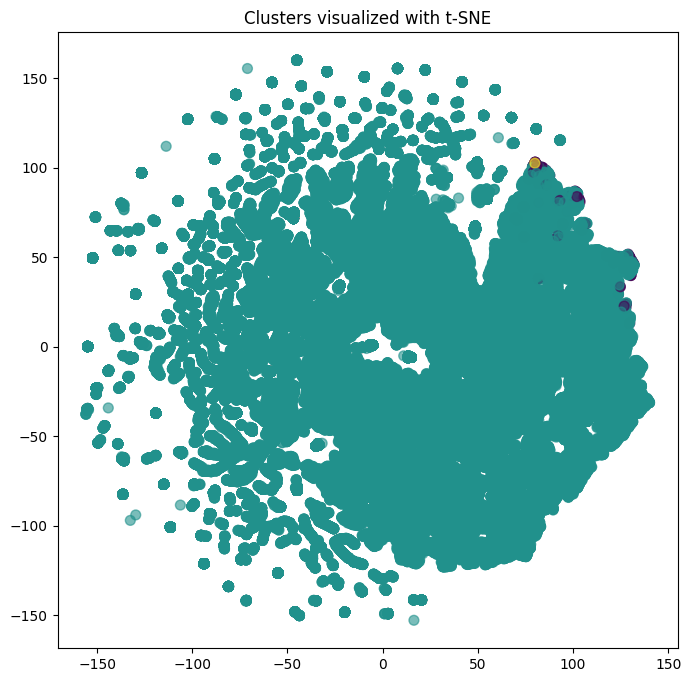

In [24]:
from sklearn.manifold import TSNE

# Use t-SNE to transform the scaled emotion features to 2D space for visualization
tsne = TSNE(n_components=2, random_state=42)
emotion_features_2d = tsne.fit_transform(emotion_features_scaled)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(emotion_features_2d[:, 0], emotion_features_2d[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Clusters visualized with t-SNE')
plt.show()


Analyzing the cluster content - examining the representative samples

In [25]:
num_clusters = test_dataset['clusterDB'].nunique()

In [27]:
#For each cluster print 5 sample reviews
for cluster in range(-1, num_clusters - 1):
    print(f"Cluster {cluster} samples:")
    sample_reviews = test_dataset[test_dataset['clusterDB'] == cluster].sample(n=5)
    print(sample_reviews[['reviewText', 'clusterDB']])  # Assuming 'review_text' holds the review contents
    print("\n")

Cluster -1 samples:
                                                reviewText  clusterDB
1525614  I think of myself as extremely lucky to of bee...         -1
1179747  My boyfriend and I have always bought chipotle...         -1
875166   Cute shirt but did not care for the fit.  I ge...         -1
812644   DO NOT ORDER! This is NOT a halter suit. it is...         -1
1558466  At first viewing, It thought I was not going t...         -1


Cluster 0 samples:
                                                reviewText  clusterDB
370933       son love this - perfect for his Negan cosplay          0
1786544  This item is poorly made. The tail cap does no...          0
1583023  The only opposition to this movie will be name...          0
73023    Item exactly as described and delivered very q...          0
341785   Provide good light so far, and hold up in the ...          0


Cluster 1 samples:
                                                reviewText  clusterDB
1467092  I read some reviews

Now lets labels the clusters based on the intents 

In [29]:
#Define Cluster-Intent mappings
cluster_to_intent = {
    0: "Appreciation/Gratitude Intent",
    1: "Problem/Issue Reporting Intent",
    2: "Inquiry/Support Intent",
    3: "Cancellation/Return Intent",
    4: "Renewal/Reorder Intent",
    5: "Comparison/Consideration Intent",
    6: "Engagement/Interaction Intent",
    7: "Praise/Endorsement Intent",
    8: "Suggestion/Improvement Intent",
    9: "Urgency/Immediate Need Intent",
    -1: "Outliers"
}

In [30]:
#Apply the mapping to the dataset
test_dataset['intent_detected'] = test_dataset['clusterDB'].map(cluster_to_intent)

In [32]:
#Now lets validate the mappings 
for intent in test_dataset['intent_detected'].unique():
    print(f"Samples for intent: {intent}")
    print(test_dataset[test_dataset["intent_detected"] == intent].sample(n=5))
    print("\n")

Samples for intent: Appreciation/Gratitude Intent
         overall  vote  verified      reviewerID        asin  \
48335          4     0      True  A2DPB0B9MKYFN1  B00009V3UL   
1726025        5     4     False  A3SFUQ7K5IIIFP  B00YXZGZTS   
1410976        1     9      True   A7YYT3GKA8W29  B001A7GOCA   
933208         5     0      True  A3P12A332WM62C  B00ZEJFWS2   
934620         5     0      True   ADSTLTFVFBFF1  B01B7EWA0K   

                       style     reviewerName  \
48335                Unknown          Matt H.   
1726025              Unknown             Buck   
1410976  {'Format:': ' DVD'}       M. Johnson   
933208               Unknown  Amazon Customer   
934620               Unknown          Yuching   

                                                reviewText  \
48335                                            fit great   
1726025  Product is what you'd expect from Magpul. Took...   
1410976  Running Time: about 50 min an episode\nPerceiv...   
933208                

In [33]:
print(test_dataset['intent_detected'].value_counts())

intent_detected
Appreciation/Gratitude Intent     99883
Outliers                            111
Problem/Issue Reporting Intent        6
Name: count, dtype: int64


In [34]:
# Assuming 'reviewText' is the column name for the full review texts
# Replace 'reviewText' with the actual column name from your dataset if different
for index, row in test_dataset[['reviewText', 'intent_detected']].iterrows():
    print(f"Review: {row['reviewText']}")
    print(f"Detected Intent: {row['intent_detected']}")
    print("-" * 80)  # Just a separator for readability


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Review: GREAT
Detected Intent: Appreciation/Gratitude Intent
--------------------------------------------------------------------------------
Review: perfect
Detected Intent: Appreciation/Gratitude Intent
--------------------------------------------------------------------------------
Review: This is a product that you just can't get too excited about, at least at first. However, after many of those "exciting" toys and products I have purchased have started to collect dust or end up being donated, I am still finding uses for these extension cords.

First of all the description at the time of purchase and this review is accurate. 16AWG/13A, 3-prong, 1-foot long (Black) cords, and UL-Certified.

As for usage, I love these cords. They come in handy when you just can't squeeze that power brick into that power outlet, or when that electrical cord comes up just a few inches too short. I use these all around the house and even carry one with me when I travel in case of a tight squeeze at a ho

In [35]:
test_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,clusterDB,intent_detected
1353734,5,4,True,AI9P883IL85RF,B004E5QJQ6,{'Color:': ' Black'},Jay Burn,This makes getting a large roast out of the pa...,"Don't roast a 20 pound ""beast"" without it.",0,make getting large roast pan easy dont forget ...,dont roast 20 pound beast without,38,21,"[amusement, pride, surprise, disapproval, real...","[0.719, 0.131, 0.047, 0.019, 0.019]",0,Appreciation/Gratitude Intent
120217,5,0,True,A1ED7YP0AZ5MTS,B000HE6ECM,Unknown,Reader 1,Great price. Works great!!,Five Stars,0,great price work great,five star,4,4,"[disappointment, disapproval, pride, confusion...","[0.994, 0.002, 0.001, 0.000, 0.000]",0,Appreciation/Gratitude Intent
1730710,5,9,True,A179UKCSK3WE50,B01EYCEBMC,Unknown,Drea Jeffries,"I was curious about how durable it would be, a...",more than just a pretty blade,0,curious durable would ordering 2 chopped cocon...,pretty blade,37,17,"[approval, pride, gratitude, disappointment, n...","[0.881, 0.033, 0.026, 0.019, 0.013]",0,Appreciation/Gratitude Intent
1687571,5,0,True,AMAWMMWM7IVTL,B00EQSL3LC,"{'Size:': ' Large/X-Large', 'Team Name:': ' Bo...",Amazon Customer,For the price this is one of the best hats tha...,Very comfortable,0,price one best hat buy plan buying another cou...,comfortable,23,10,"[pride, disapproval, excitement, neutral, disg...","[0.995, 0.002, 0.001, 0.000, 0.000]",0,Appreciation/Gratitude Intent
751410,5,0,True,A3AP2MA7YIWA4F,B00T42620M,Unknown,Rick In NorthEast,"Fits great, thin and soft.",Good buy.,0,fit great thin soft,good buy,5,4,"[disappointment, disapproval, pride, confusion...","[0.991, 0.003, 0.002, 0.001, 0.000]",0,Appreciation/Gratitude Intent


So as we understand that using the emotions to detect the reviews in particular is causing issues with classifying for the intent so we will try using DBSCAN just for the review and the intent

In [36]:
test1_dataset = entire_dataset.sample(n=100000, random_state=42)
print(test1_dataset.shape)

(100000, 16)


In [37]:
test1_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores
1353734,5,4,True,AI9P883IL85RF,B004E5QJQ6,{'Color:': ' Black'},Jay Burn,This makes getting a large roast out of the pa...,"Don't roast a 20 pound ""beast"" without it.",0,make getting large roast pan easy dont forget ...,dont roast 20 pound beast without,38,21,"[amusement, pride, surprise, disapproval, real...","[0.719, 0.131, 0.047, 0.019, 0.019]"
120217,5,0,True,A1ED7YP0AZ5MTS,B000HE6ECM,Unknown,Reader 1,Great price. Works great!!,Five Stars,0,great price work great,five star,4,4,"[disappointment, disapproval, pride, confusion...","[0.994, 0.002, 0.001, 0.000, 0.000]"
1730710,5,9,True,A179UKCSK3WE50,B01EYCEBMC,Unknown,Drea Jeffries,"I was curious about how durable it would be, a...",more than just a pretty blade,0,curious durable would ordering 2 chopped cocon...,pretty blade,37,17,"[approval, pride, gratitude, disappointment, n...","[0.881, 0.033, 0.026, 0.019, 0.013]"
1687571,5,0,True,AMAWMMWM7IVTL,B00EQSL3LC,"{'Size:': ' Large/X-Large', 'Team Name:': ' Bo...",Amazon Customer,For the price this is one of the best hats tha...,Very comfortable,0,price one best hat buy plan buying another cou...,comfortable,23,10,"[pride, disapproval, excitement, neutral, disg...","[0.995, 0.002, 0.001, 0.000, 0.000]"
751410,5,0,True,A3AP2MA7YIWA4F,B00T42620M,Unknown,Rick In NorthEast,"Fits great, thin and soft.",Good buy.,0,fit great thin soft,good buy,5,4,"[disappointment, disapproval, pride, confusion...","[0.991, 0.003, 0.002, 0.001, 0.000]"


In [40]:
#Vectorize the clean_reviewText
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform the clean_reviewText
X = vectorizer.fit_transform(test1_dataset['clean_reviewText'])

In [57]:
from sklearn.cluster import DBSCAN

# Initialize and run DBSCAN
dbscan = DBSCAN(eps=0.70, min_samples=5, metric='cosine')  # Consider using cosine similarity for text data
clusters = dbscan.fit_predict(X)

# Add the cluster labels to your dataset
test1_dataset['intent_cluster'] = clusters

Evaluate and interpret the clusters

In [58]:
# Check the size of each cluster
print(test1_dataset['intent_cluster'].value_counts())

# Examine sample reviews from each cluster
for cluster in sorted(test1_dataset['intent_cluster'].unique()):
    print(f"Cluster {cluster} samples:")
    print(test_dataset[test1_dataset['intent_cluster'] == cluster].sample(n=5)['reviewText'])
    print("\n")


intent_cluster
 0    93090
-1     6887
 2        9
 1        8
 3        6
Name: count, dtype: int64
Cluster -1 samples:
257769     I use K&N religiously on my Harley, so I alway...
495162     Recommended by my husbands therapist after han...
995554                                                  YUK!
410034                                            Breakouts.
1856931    I bought one of these for access to a vacation...
Name: reviewText, dtype: object


Cluster 0 samples:
1263127    I have always love kiwi and I consider them on...
398292                                      Not happy at all
908077                        I love it.  Item as described.
256289                                 Exactly as described.
1212598    I returned this table because it did not adjus...
Name: reviewText, dtype: object


Cluster 1 samples:
1581148    As a long time fan of James Arness I was thril...
1562711    With 2 entertaining couples (Dietrich-Stewart ...
1483447    After filming 1932's STRANGE I

In [59]:
test1_dataset.head()

,overall,vote,verified,reviewerID,asin,style,reviewerName,reviewText,summary,has_image,clean_reviewText,clean_summary,reviewText_length,clean_reviewText_length,review_emotions,review_emotion_scores,intent_cluster
1353734,5,4,True,AI9P883IL85RF,B004E5QJQ6,{'Color:': ' Black'},Jay Burn,This makes getting a large roast out of the pa...,"Don't roast a 20 pound ""beast"" without it.",0,make getting large roast pan easy dont forget ...,dont roast 20 pound beast without,38,21,"[amusement, pride, surprise, disapproval, real...","[0.719, 0.131, 0.047, 0.019, 0.019]",0
120217,5,0,True,A1ED7YP0AZ5MTS,B000HE6ECM,Unknown,Reader 1,Great price. Works great!!,Five Stars,0,great price work great,five star,4,4,"[disappointment, disapproval, pride, confusion...","[0.994, 0.002, 0.001, 0.000, 0.000]",0
1730710,5,9,True,A179UKCSK3WE50,B01EYCEBMC,Unknown,Drea Jeffries,"I was curious about how durable it would be, a...",more than just a pretty blade,0,curious durable would ordering 2 chopped cocon...,pretty blade,37,17,"[approval, pride, gratitude, disappointment, n...","[0.881, 0.033, 0.026, 0.019, 0.013]",0
1687571,5,0,True,AMAWMMWM7IVTL,B00EQSL3LC,"{'Size:': ' Large/X-Large', 'Team Name:': ' Bo...",Amazon Customer,For the price this is one of the best hats tha...,Very comfortable,0,price one best hat buy plan buying another cou...,comfortable,23,10,"[pride, disapproval, excitement, neutral, disg...","[0.995, 0.002, 0.001, 0.000, 0.000]",0
751410,5,0,True,A3AP2MA7YIWA4F,B00T42620M,Unknown,Rick In NorthEast,"Fits great, thin and soft.",Good buy.,0,fit great thin soft,good buy,5,4,"[disappointment, disapproval, pride, confusion...","[0.991, 0.003, 0.002, 0.001, 0.000]",0


In [60]:
#Review cluster samples
for cluster_id in sorted(test1_dataset['intent_cluster'].unique()):
    print(f"Cluster {cluster_id} sample reviews:")
    sample_reviews = test1_dataset[test1_dataset['intent_cluster'] == cluster_id].sample(min(len(test1_dataset[test1_dataset['intent_cluster'] == cluster_id]), 5))  # Take 5 samples or total reviews if less than 5
    for review in sample_reviews['reviewText']:  # Replace 'reviewText' with the actual column name of your reviews
        print(f"- {review}")
    print("\n")


Cluster -1 sample reviews:
- They break if there's a slight breeze. They get your arm caught on EVERYTHING and I almost got hurt. Nope!
- The film quality may not please some persnickety movie collectors, but it seems to me to be a clean new issue and I am so glad to be able finally to obtain a copy of this rather peculiar oevre.  Enjoyable as a visual version of Kafka's novel and for lovers of the absurd and surreal.
- I ENJOY THE MRE's THEY ARE A COMPLETE MEAL FOR ME. I AM A DISABLED VET AND I HAVE A LOT OF TROUBLE GETTING AROUND IN DOING MOST ANYTHING IN THE KITCHEN, THUS IT IS EASY FOR ME TO HEAT THE PACKAGE IN SIMMERING WATER TO BRING THE FOOD TO THE CORRECT TEMPERATURE AND EASY FOR ME TO GET THE FOOD ONTO A DISH AND ENJOY A FILLING AND SATISFYING MEAL.WHEN I WAS ON ACTIVE DUTY MANY YEARS AGO I NEVER MINDED HAVING ONLY RATIONS AS I KNEW THEY WERE MADE WELL AND NUTRITIOUS.NOW I FIND THEM TO BE JUST VERY CONVENIENT ALSO.
- Just installed it today to be used as a floodlight. It is ve

Now lets once more try to see if there is a better result after text preprocessing and vectorization

In [62]:
!pip install nltk
#Advanced text preprocessing
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

new_stopwords = set(stopwords.words('english')) | {'additional', 'stopwords', 'specific', 'to', 'your', 'domain'}

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [63]:
#Apply lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in new_stopwords]
    return ' '.join(lemmatized)

test1_dataset['processed_reviews'] = test1_dataset['reviewText'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [67]:
test1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1353734 to 405049
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   overall                  100000 non-null  int64 
 1   vote                     100000 non-null  int64 
 2   verified                 100000 non-null  bool  
 3   reviewerID               100000 non-null  object
 4   asin                     100000 non-null  object
 5   style                    100000 non-null  object
 6   reviewerName             100000 non-null  object
 7   reviewText               100000 non-null  object
 8   summary                  100000 non-null  object
 9   has_image                100000 non-null  int64 
 10  clean_reviewText         100000 non-null  object
 11  clean_summary            100000 non-null  object
 12  reviewText_length        100000 non-null  int64 
 13  clean_reviewText_length  100000 non-null  int64 
 14  review_emotions    

In [68]:
#Utilizing n-grams for tf-idf vectorization
ngram_range = (1, 2)

In [70]:
new_stopwords_list = list(new_stopwords)  # Convert set to list

In [72]:
#TF-IDF with N-grams
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=new_stopwords_list, ngram_range=(1, 2), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(test1_dataset['processed_reviews'])


In [73]:
#Vectorize the clean_reviewText
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform the clean_reviewText
X = vectorizer.fit_transform(test1_dataset['processed_reviews'])

In [86]:
from sklearn.cluster import DBSCAN

# Initialize and run DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5, metric='cosine')  # Consider using cosine similarity for text data
clusters = dbscan.fit_predict(X)

# Add the cluster labels to your dataset
test1_dataset['intent_cluster1'] = clusters

In [87]:
# Check the size of each cluster
print(test1_dataset['intent_cluster1'].value_counts())

# Examine sample reviews from each cluster
for cluster in sorted(test1_dataset['intent_cluster1'].unique()):
    print(f"Cluster {cluster} samples:")
    print(test_dataset[test1_dataset['intent_cluster1'] == cluster].sample(n=5)['reviewText'])
    print("\n")

intent_cluster1
 0     70897
-1     28851
 2        14
 20       14
 7        11
 26       10
 10       10
 32       10
 15        9
 3         9
 9         8
 19        8
 5         7
 24        7
 16        6
 33        6
 18        6
 14        5
 28        5
 39        5
 23        5
 21        5
 1         5
 27        5
 30        5
 40        5
 17        5
 31        5
 38        5
 29        5
 11        5
 22        5
 8         5
 35        5
 34        5
 13        5
 37        5
 4         4
 6         4
 25        4
 12        3
 36        2
Name: count, dtype: int64
Cluster -1 samples:
652955     *UPDATE 10/29/15*\nAfter I received my Nexus 6...
1558513    I remember this movie from the theaters and wh...
401241     Yuck yuck yuck! I used to wear this in college...
1318403    These glass storage containers are great for a...
1490692    Jack Strong is not some super hero but a the c...
Name: reviewText, dtype: object


Cluster 0 samples:
1916752    Wow what a great switch

ValueError: Cannot take a larger sample than population when 'replace=False'

In [88]:
from sklearn.metrics import silhouette_score

# Compute the silhouette scores for the scaled features and DBSCAN clusters
silhouette_avg = silhouette_score(emotion_features_scaled, clusters)
print('The average silhouette score is:', silhouette_avg)

The average silhouette score is: -0.6491689237094369


Lets try k-means to cluster the 10 dufferent intents

In [2]:
subset_size = 100000
subset_intent = entire_dataset.sample(n=subset_size, random_state=42)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
vectorized_text = vectorizer.fit_transform(subset_intent['clean_reviewText'])

In [4]:
from sklearn.cluster import KMeans

#Define the number of clusters
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(vectorized_text)

#Add the cluster labels to the dataset
subset_intent['intent_cluster'] = clusters

C:\Users\adnan\anaconda3\New folder\envs\mynewenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print(subset_intent['intent_cluster'].value_counts())

intent_cluster
0    68192
8     7532
1     5517
2     4112
7     3412
6     2986
5     2895
4     2030
9     2027
3     1297
Name: count, dtype: int64


In [6]:
for i in range(num_clusters):
    print(f"Cluster {i} samples:")
    print(subset_intent[subset_intent['intent_cluster'] == i]['reviewText'].sample(5))
    print("\n")

Cluster 0 samples:
1300425    I have cooked some of those frozen steamer bag...
1310036    I bought this good quality, easy to use, name ...
1300305    Beautiful as expected this is my second purcha...
1322849    I love this pan for cooking vegetables on the ...
462012     As with all electric shavers, it will never gi...
Name: reviewText, dtype: object


Cluster 1 samples:
929937     Fits great! Would buy again! Full coverage for...
892619     It is basically as pictured, she is wearing a ...
1738991    It is really nice, solid holster for the price...
602562     The screen protector is 1/8 short on both side...
662529     This is the "swiss army knife" of cases.  It i...
Name: reviewText, dtype: object


Cluster 2 samples:
185211     Works as expected.\nEasy to install.\nWater ta...
214782     These scanner does not work on BMW 99 cars . I...
373345     works perfectly. I have jumped 3 cars but not ...
567585     All Andis products work just the way they are ...
1942841              

In [7]:
#Define the mappings based on the cluster evaluation
cluster_to_intent = {
    0: "Appreciation/Gratitude Intent",
    1: "Problem/Issue Reporting Intent",
    2: "Inquiry/Support Intent",
    3: "Cancellation/Return Intent",
    4: "Renewal/Reorder Intent",
    5: "Comparison/Consideration Intent",
    6: "Engagement/Interaction Intent",
    7: "Praise/Endorsement Intent",
    8: "Suggestion/Improvement Intent",
    9: "Urgency/Immediate Need Intent",
    -1: "Outliers"
}

#Apply the mapping to the dataset
subset_intent['mapped_intent'] = subset_intent['intent_cluster'].map(cluster_to_intent)

In [8]:
#Evaluate the initial mappings 
for intent, group in subset_intent.groupby('mapped_intent'):
    print(f"Intent: {intent}")
    for index, row in group.sample(5).iterrows():
        print(f"Review: {row['reviewText']}")
        print("-" * 100)
    print("\n\n")

Intent: Appreciation/Gratitude Intent
Review: This is a wonderful, relaxing tea that tastes great on its own (slightly sweet) or sweetened with a few drops of stevia.  A single tea bag works for me, but you can brew a slightly stronger cup with two bags, if needed.  I only use one and probably drink this about 3 nights a week, since I take&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Source-Naturals-L-Tryptophan-500mg-120-Tablets/dp/B000GFHPNY/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Source Naturals L-Tryptophan 500mg, 120 Tablets</a>,<a data-hook="product-link-linked" class="a-link-normal" href="/Country-Life-Chelated-Magnesium-250-mg-180-tablets/dp/B00013YZNO/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Country Life - Chelated Magnesium, 250 mg, 180 tablets</a>, and&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Source-Naturals-Melatonin-2-5mg-Peppermint-240-Tablets/dp/B000GFPCN4/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Source Naturals Melatonin 2.5mg, Peppermint, 2

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from IPython.display import display
import ipywidgets as widgets

# Reduce dimensionality
pca = PCA(n_components=50)  # Adjust based on your dataset
reduced_data = pca.fit_transform(vectorized_text.toarray())  # Replace 'vectorized_text' with your data variable

# Apply Agglomerative clustering
n_clusters = 10  # Set your desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(reduced_data)

# Assign clusters back to your subset if necessary
subset_intent['agg_cluster'] = agg_clusters  # Make sure 'subset' is your data frame


C:\Users\adnan\anaconda3\New folder\envs\mynewenv\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


MemoryError: unable to allocate array data.

In [12]:
random_sample1 = entire_dataset.sample(n=1000, random_state=42)
extracted_data = random_sample1[['reviewText', 'review_emotions', 'review_emotion_scores']]
extracted_data.to_csv('sample_reviews.csv', index=False)